## Data Storyteling (Analysis and Visualization) of 911 Calls Data (Gotten from Kaggle)


### Author: Ajibade Abdulquddus

____
#### Import numpy and pandas Libraries

In [1]:
import numpy as np
import pandas as pd

 #### Import visualization libraries, set %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Read the csv file as a dataframe called df 

In [3]:
df= pd.read_csv('911.csv')

#### Check the head of df

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### To find the top 5 zip codes for 911 Calls

In [6]:
df['zip'].value_counts().head(5)

#OTHER METHODS

#df['zip'][0:5]
#df['zip'].nlargest(5)



19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### To find the top 5 townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### To check the number of unique title codes on the 'title' column

In [42]:
lists = []
for x in df['title']:
    if x not in lists:
        lists.append(x)
len(lists)

#OR
#df['title'].nunique()
#OR
#len(set(df['title']))

110

#### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

#### To Create a new column containing reasons for the Calls.

In [50]:
df['Reason']= df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

#### To find the most common Reason for a 911 call based off of this new column

In [11]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### To use seaborn to create a countplot of 911 calls by Reason. 

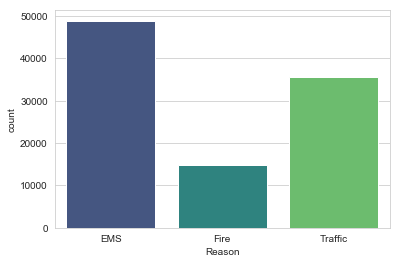

In [12]:
sns.countplot('Reason', data= df, palette='viridis')


___
####  To check for the data type of the objects in the timeStamp column

In [13]:
type(df['timeStamp'].iloc[0])

str

#### To convert the column from strings to DateTime objects. 

In [14]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
print(time)


2015-12-10 17:40:00


#### To create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column

In [43]:
#MORE ON: datetime — Basic date and time types;  VISIT:
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

df['Hour']= df['timeStamp'].apply(lambda x:x.hour)
df['Month']= df['timeStamp'].apply(lambda x:x.month)
df['Day of Week']= df['timeStamp'].apply(lambda x:x.dayofweek)

#### To change the Day of Week values from numbers to actual Days of Weeks short forms mapping with this dictionary

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

#### Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

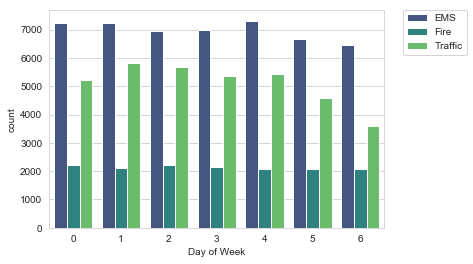

In [44]:
sns.countplot('Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(loc= 'center left', bbox_to_anchor=(1.04,0.9))

#### Doing the same for Month:

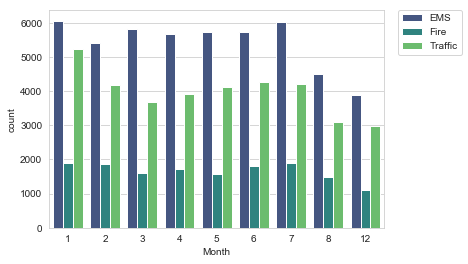

In [20]:
sns.countplot('Month', data=df, hue='Reason', palette='viridis')
plt.legend(loc= 'center left', bbox_to_anchor=(1.04,0.9), borderaxespad=0.)

**Grouping the Data Frame by Months**

In [22]:
byMonth= df.groupby('Month').count()
byMonth.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078


**To create a simple plot off of the dataframe indicating the count of calls per month.**

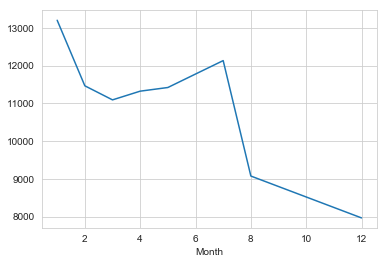

In [23]:
byMonth['twp'].plot()

**Using seaborn's lmplot to create a linear fit on the number of calls per month.**

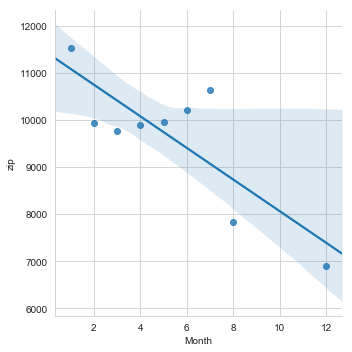

In [46]:
sns.lmplot('Month', 'zip', data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [48]:
df['Date']= df['timeStamp'].apply(lambda x:x.date())
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

**To groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

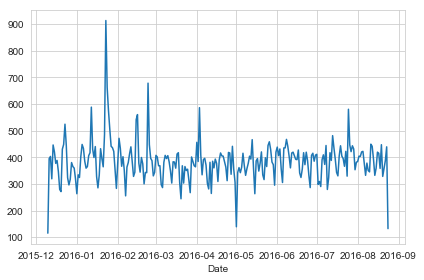

In [27]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

#### To create plots each representing a Reason for the 911 call

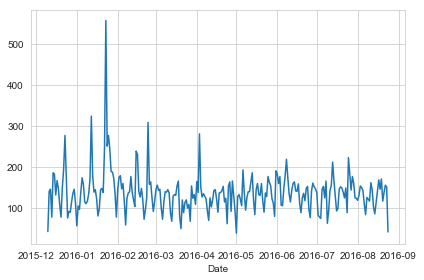

In [49]:
# For Traffic Reason

df[df['Reason']=='Traffic'].groupby('Date')['twp'].count().plot()
plt.tight_layout()

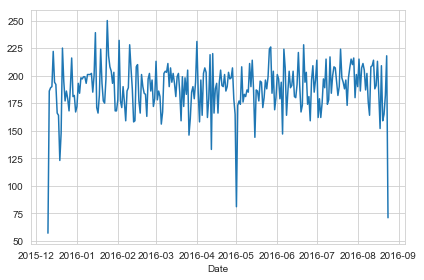

In [31]:
#For EMS Reason

df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

____
**Creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week using Unstack method:**

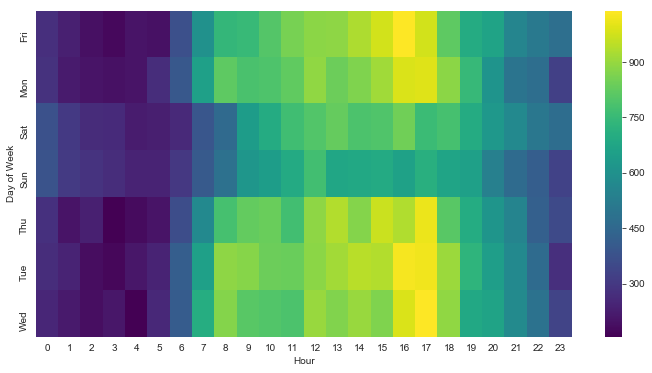

In [32]:
dayHour=df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap= 'viridis')

**To create a clustermap using this DataFrame:**

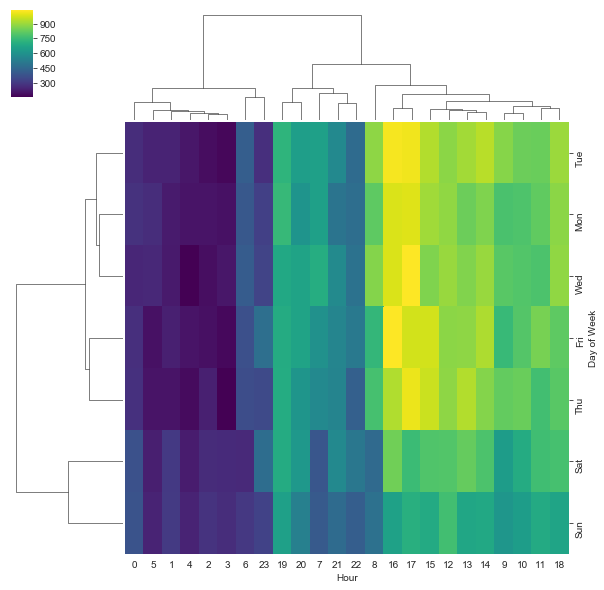

In [33]:
sns.clustermap(dayHour, cmap='viridis')

**Repeating these same plots and operations, for a DataFrame that shows the Month as the column:**

In [34]:
dayMonth= df.groupby(['Day of Week', 'Month']).count()['Hour'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


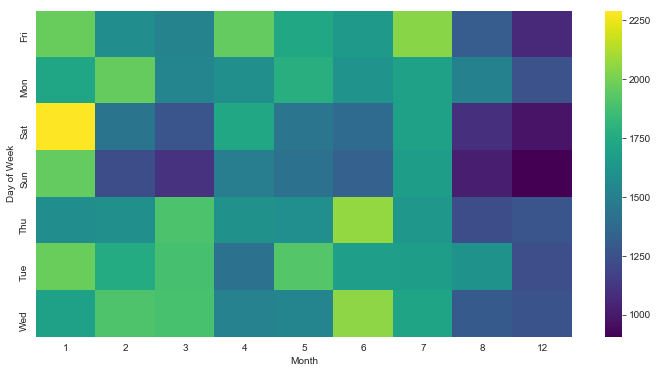

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap= 'viridis')

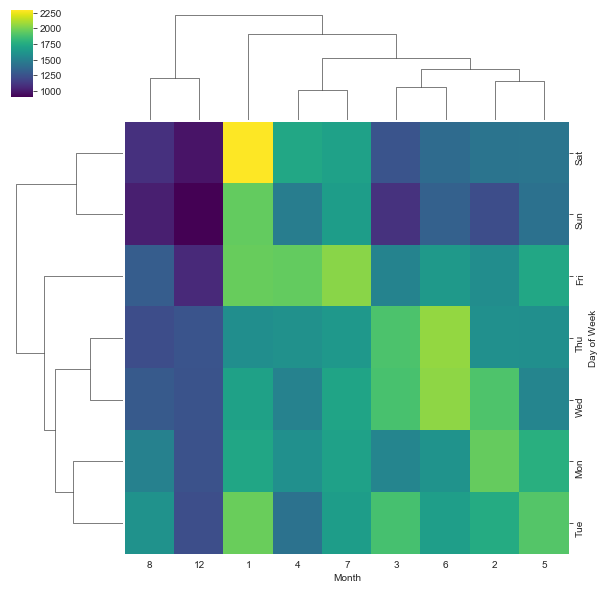

In [36]:
sns.clustermap(dayMonth, cmap='viridis')

# The End!

**To drop comments and Follow for more of this:**

GitHub: https://github.com/Ajisco

LinkedIn: https://www.linkedin.com/in/ajibade-abdulquddus-ab5237159

Twitter: https://mobile.twitter.com/Dayo_Ajisco

Instagram: https://www.instagram.com/dayo_ajisco

Phone No./ WhatsApp No.: +2349030987312